<a href="https://colab.research.google.com/github/wafaa-qurashi/wafaa-qurashi/blob/main/Another_copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Churn_Modelling.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1 

# New Section

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# 2. Handle missing values
# Drop rows with missing values
df.dropna(inplace=True)


# 3. Encode categorical variables
# Encode 'Gender': Male=1, Female=0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encode 'Geography' using One-Hot Encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Optional: Check the cleaned data
print(df.head())
print("\nData shape after cleaning:", df.shape)


   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0  42.0       2       0.00              1        1.0   
1          608       0  41.0       1   83807.86              1        0.0   
2          502       0  42.0       8  159660.80              3        1.0   
3          699       0  39.0       1       0.00              2        0.0   
5          645       1  44.0       8  113755.78              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0             1.0        101348.88       1              False            False  
1             1.0        112542.58       0              False             True  
2             0.0        113931.57       1              False            False  
3             0.0         93826.63       0              False            False  
5             0.0        149756.71       1              False             True  

Data shape after cleaning: (9998, 12)


start EDA
1- Check how balanced the target variable (Exited) is

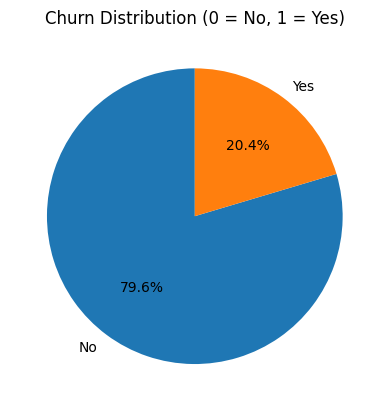

Exited
0    0.796159
1    0.203841
Name: proportion, dtype: float64


In [ ]:
# Class distribution
plt.pie(df['Exited'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

print(df['Exited'].value_counts(normalize=True))


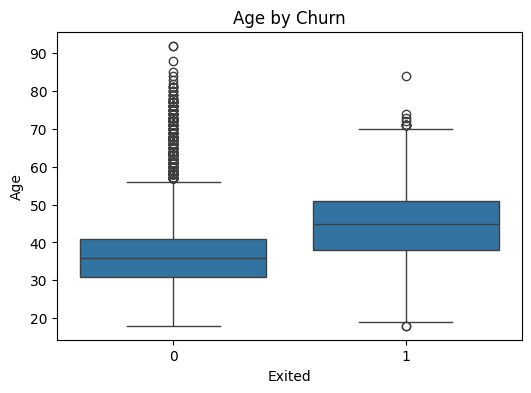

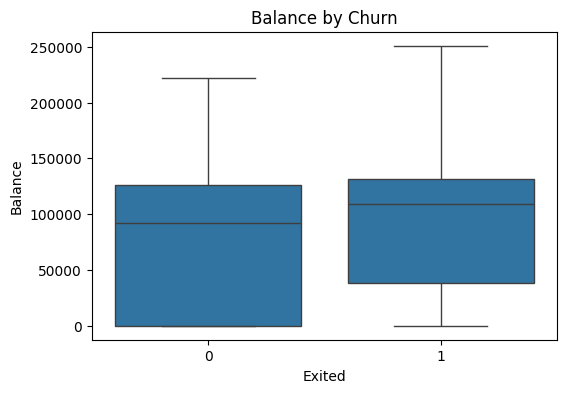

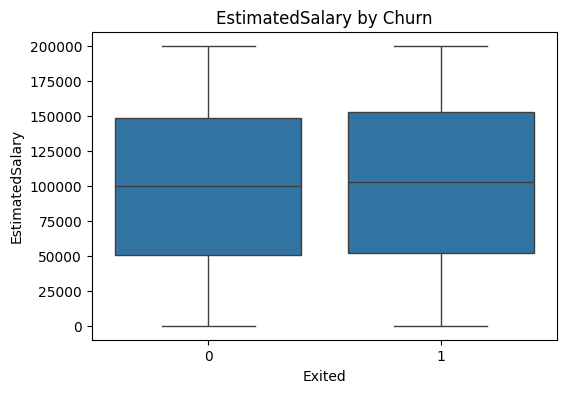

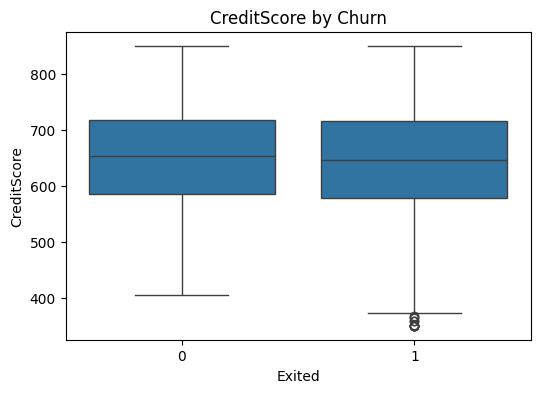

In [ ]:
for col in ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f"{col} by Churn")
    plt.show()

Categorical Features vs Churn

In [ ]:
# Gender vs Churn
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Gender vs Churn")
plt.show()

# Geography vs Churn (before encoding)
sns.countplot(x='Geography', hue='Exited', data=pd.read_csv("Churn_Modelling.csv"))
plt.title("Geography vs Churn")
plt.show()

NameError: name 'sns' is not defined

Check feature correlations with churn and with each other


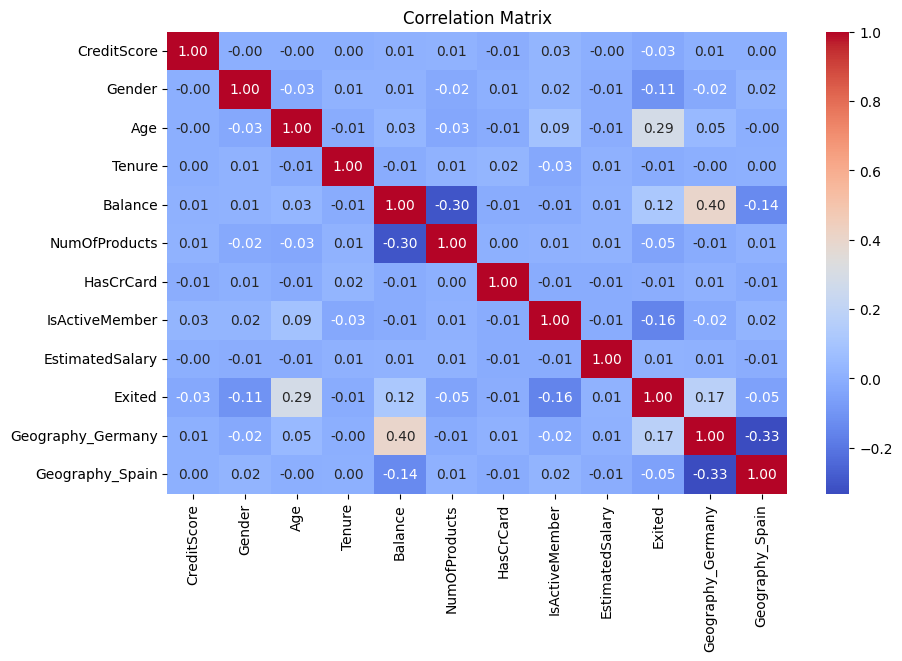

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

 Churn by Tenure and Products



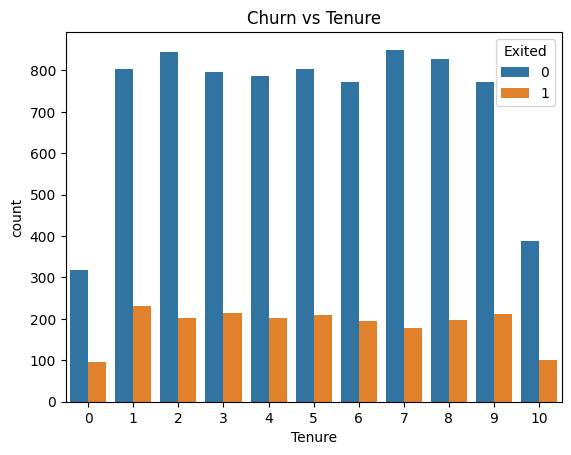

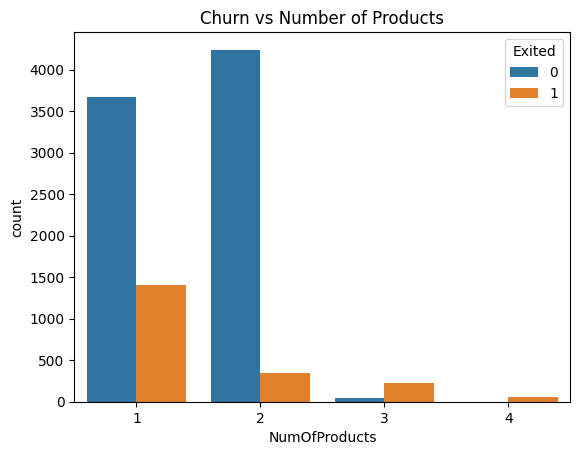

In [ ]:
# Tenure
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title("Churn vs Tenure")
plt.show()

# Num of Products
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Churn vs Number of Products")
plt.show()


 Insight:


1.  Customers on age 31-40 have a more churned count .

2. Customers with higher salary averages were churn .
3. Customers with  Number of products  2 often stay .
4. France have higher churn rates
5. Tenure does not always indicate loyalty.